In [1]:
# -*- coding: utf-8 -*-
"""
Created on May 27, 2024
Last modified on May 31, 2024
@Author: Guan-Fu Liu

To read and analyse the results for LRNAs.
"""
from read_results import *
import re
from matplotlib.gridspec import GridSpec
%matplotlib widget

The elements you notice but not available in the yield table of SNIa, Z_0_02 are
 {'He', 'H'}
The yields from SNIa are taken into consideration in the result to be analysed.
0.00686696764223117
The elements you notice but not available in the yield table of SNIa, Z_0_02 are
 {'He', 'H'}
The yields from SNIa are taken into consideration in the result to be analysed.
0.006861090872718941


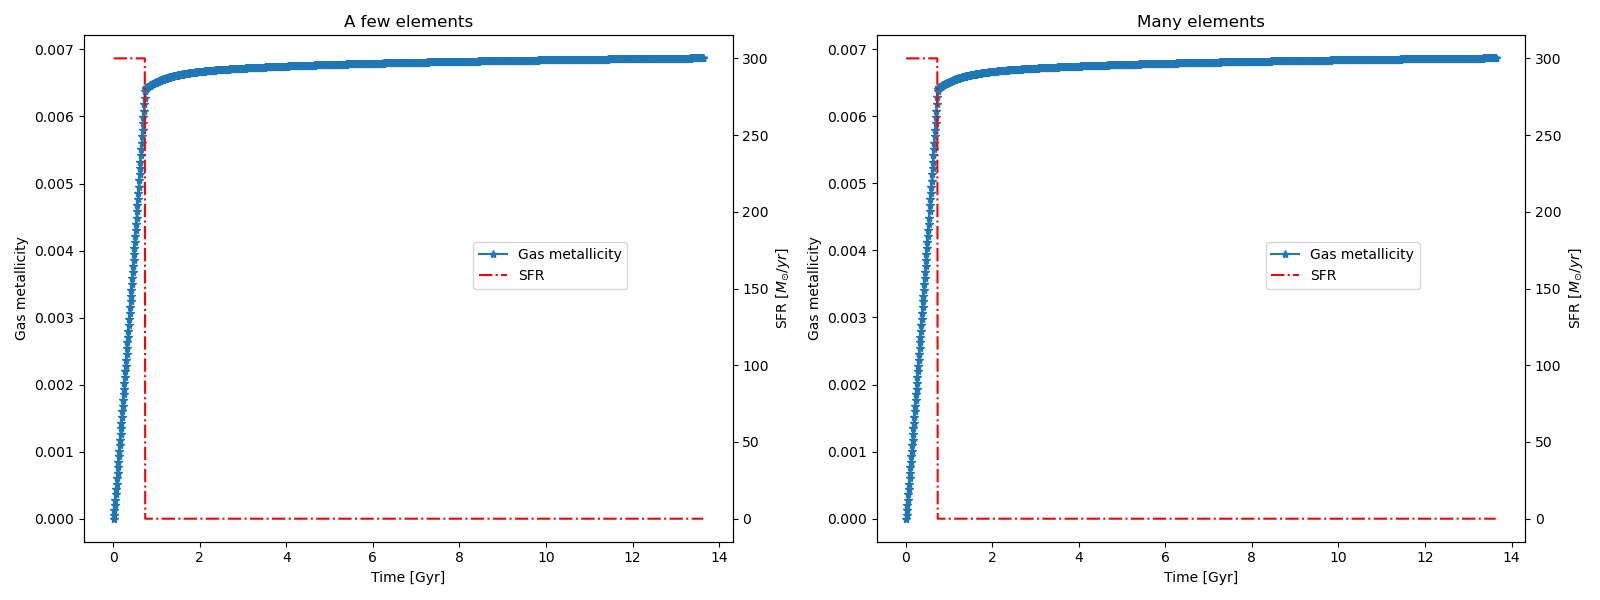

In [6]:
file_paths = ["./outputs/LRNAs/N13-Few-Elements-Log-Log.h5", "./outputs/LRNAs/N13-Many-Elements-Log-Log.h5"]
titles = ["A few elements", "Many elements"]

fig, axes = plt.subplots(1, 2, figsize=(16,6))
ZGas_all = [ ]
for i, file_path in enumerate(file_paths):
    ax = axes[i]
    yield_files, groups, ElemNotice, dfs, ElemIntersect, SNIaOn, mass_lifeAge_file, mass_lifeAge, SFH, StarInitElement,\
                StellarMass, SNccNum, SNIaNum, AGB_Num, GasElement, ZGas, EjectElement, SNccElement, SNIaElement,\
                AGB_Element, YieldsTable, IMF_type, IMF_data, creation_Age, SFE, \
                interp_kind, comments, solar_set = read_results(file_path)

    line1, = ax.plot(SFH['Age']/1e9, ZGas, '-*')
    ax1 = ax.twinx()
    line2, = ax1.plot(SFH['Age']/1e9, SFH['SFR'], '-.', color='r')
    ax.set_xlabel("Time [Gyr]")
    ax.set_ylabel("Gas metallicity")
    ax1.set_ylabel(r"SFR [$M_{\odot}/yr$]")
    ax.legend((line1, line2), ("Gas metallicity", "SFR"), loc=(0.6, 0.5))
    ax.set_title(titles[i])
    print(ZGas[-1])
    ZGas_all.append(ZGas)
fig.tight_layout()
plt.show()

In [7]:
(np.abs(ZGas_all[0] - ZGas_all[1])/ZGas_all[0]).mean()

0.0008544366561378157

In [8]:
(np.abs(ZGas_all[0] - ZGas_all[1])/ZGas_all[0]).min()

0.0

In [9]:
(np.abs(ZGas_all[0] - ZGas_all[1])/ZGas_all[0]).max()

0.0012511747923758065

The elements you notice but not available in the yield table of SNIa, Z_0_02 are
 {'He', 'H'}
The yields from SNIa are taken into consideration in the result to be analysed.
The elements you notice but not available in the yield table of SNIa, Z_0_02 are
 {'He', 'H'}
The yields from SNIa are taken into consideration in the result to be analysed.
The elements you notice but not available in the yield table of SNIa, Z_0_02 are
 {'He', 'H'}
The yields from SNIa are taken into consideration in the result to be analysed.
The elements you notice but not available in the yield table of SNIa, Z_0_02 are
 {'He', 'H'}
The yields from SNIa are taken into consideration in the result to be analysed.
The elements you notice but not available in the yield table of SNIa, Z=0.02 are
 {'He', 'H'}
The yields from SNIa are taken into consideration in the result to be analysed.
0.004096185536098938


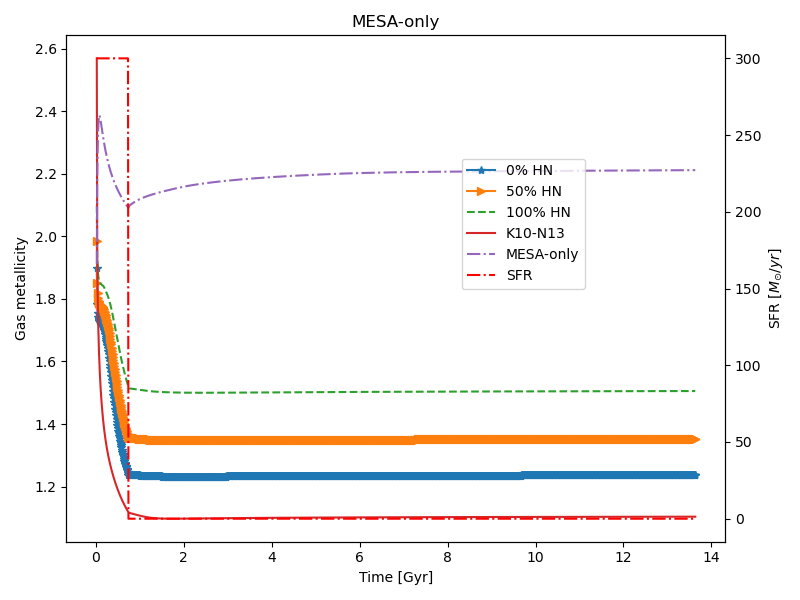

In [34]:
file_paths = ["./outputs/LRNAs/N13-0.0-HN.h5", "./outputs/LRNAs/N13-0.5-HN.h5",
              "./outputs/LRNAs/N13-1.0-HN.h5", "./outputs/LRNAs/K10-N13.h5", "./outputs/LRNAs/MESA-only.h5"]
titles = ["0% HN", "50% HN", "100% HN", "K10-N13", "MESA-only"]

fig, axes = plt.subplots(1, 1, figsize=(8,6))
Zi2Zj = {}
for i, file_path in enumerate(file_paths):
    Zi2Zj[titles[i]] = { }
    ax = axes
    yield_files, groups, ElemNotice, dfs, ElemIntersect, SNIaOn, mass_lifeAge_file, mass_lifeAge, SFH, StarInitElement,\
                StellarMass, SNccNum, SNIaNum, AGB_Num, GasElement, ZGas, EjectElement, SNccElement, SNIaElement,\
                AGB_Element, YieldsTable, IMF_type, IMF_data, creation_Age, SFE, \
                interp_kind, comments, solar_set = read_results(file_path)
    Zi2Zj[titles[i]].update(GetZi2Zj(GasElement, "O", "Ne", solar_set,))

line1, = ax.plot(SFH['Age'][Zi2Zj[titles[0]]["O/Ne-mask"]]/1e9, Zi2Zj[titles[0]]["O/Ne"], '-*')
line2, = ax.plot(SFH['Age'][Zi2Zj[titles[1]]["O/Ne-mask"]]/1e9, Zi2Zj[titles[1]]["O/Ne"], '->')
line3, = ax.plot(SFH['Age'][Zi2Zj[titles[2]]["O/Ne-mask"]]/1e9, Zi2Zj[titles[2]]["O/Ne"], '--')
line4, = ax.plot(SFH['Age'][Zi2Zj[titles[3]]["O/Ne-mask"]]/1e9, Zi2Zj[titles[3]]["O/Ne"], '-')
line5, = ax.plot(SFH['Age'][Zi2Zj[titles[4]]["O/Ne-mask"]]/1e9, Zi2Zj[titles[4]]["O/Ne"], '-.')
ax1 = ax.twinx()
line_sfh, = ax1.plot(SFH['Age']/1e9, SFH['SFR'], '-.', color='r')
ax.set_xlabel("Time [Gyr]")
ax.set_ylabel("Gas metallicity")
ax1.set_ylabel(r"SFR [$M_{\odot}/yr$]")
ax.legend((line1, line2, line3, line4, line5, line_sfh), 
          (titles[0], titles[1], titles[2], titles[3], titles[4], "SFR"), loc=(0.6, 0.5))
ax.set_title(titles[i])
print(ZGas[-1])
ZGas_all.append(ZGas)
fig.tight_layout()
plt.show()